*Sample Dataset*

In [2]:
import pandas as pd 

pizza = {'diameter' : [6, 8, 10, 14, 18],
         'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Import module pandas.  Dictionary terdiri dari 2 buah list, yaitu diameter dan harga yang akan ditampung dalam variabel pizza untuk dibentuk sebagai object data frame yang dilakukan drngan cara pd. DataFrame yang akan memanggil variabel pizza.  Untuk memanggil atau mengeluarkan hasilnya dapat disertakan pizza_df.
Nilai diameter pizza berperan sebagai feature sedangkan harga pizza bereperan sebagai target

*Visualisasi Data*

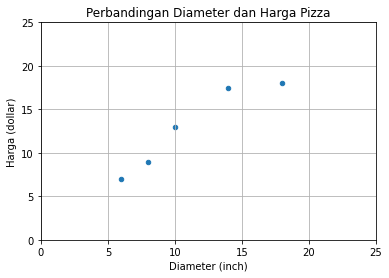

In [4]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Import matplotlib.pyplot as plt.  Terdiri dari 3 parameter,  yaitu kind yang diberi nilai scatter karena plotting yang ingin fihasilkan adalah scatterplot,  sumbu x diasosiasikan  dengan diameter,  sumbu y diasosiasikan drngan harga. plt.title, plt.xlabel, dan plt. ylabel bertujuan untuk mengatur judul dan label pada sumbu x maupun sumbu y. Xlim dan ylim digunakan untuk mrngatur jangkauan dumbu x dan juga jangkauan sumbu y yang nilai dimulai dari 0 hingga 25. Kemudian memanggil plt.grid(True) dan terakhir untuk menampilkan menggunakan plt.show()

*Simple Linear Regression Model* (sebagai solusi)

*Penyesuaian Data Set*

In [5]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'Y: {y}')

X: [ 6  8 10 14 18]
Y: [ 7.   9.  13.  17.5 18. ]


In [6]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

Langkah pertama yang dapat dilakukan adalah memidahkan feature dan target.  Selanjutnya akan menggunakan konstruktur data dari yang menggunakan pandas dataframe menjadi numpy array drngan mengimport numpy terlebih dahulu dengan selanjutnya membuat variabel X untuk menampung feature dan y untuk menampung target. 
Methode X.reshape itu adalah untuk menambahkan bayangan atau dimensi. 


*Training Simple Linear Regression Model*

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Import sklean.linear_model. Dalam variabel model berisi LinearRegession() yang akan ditraining drngan method fit. Method fit membutuhkan 2 parameter, yaitu sekumpulan nilai X(feature) dan sekumpulan nilai y(target).

*Visualisasi Simple Linear Regression Model*

In [9]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

plt.scatter(X, y)   #untuk melakukan plotting marker berwarna biru dengan jumlah markernya 5
plt.plot(X_vis, y_vis, '-r')  #melakukan plot untuk garis merah 
#- untuk membentuk garis lurus
#r berelasi dengan warna merah

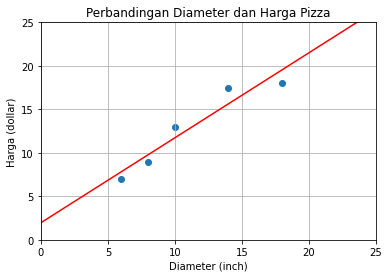

In [10]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

*Formula Linear Regression: y=α+βx*

y : response variabel (target)

x : explanatory variabel (features)

α : intercept #garis linesr yang menabrak suatu titik di sumbu y (nilai pada sumbu y ketika sumbu x bernilai 0)

β : slope #berpengaruh pada tingkat kemiringan garis linear yang terbentuk,  nilao slope 0 akan menghasilkan nilai horizontal

In [11]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


*Mencari nilai slope*

In [16]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'Y\y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

Y\y: [ 7.   9.  13.  17.5 18. ]


Methode flatten adalah methode untuk mengrmbalikan hasil ke asal yang bukan dua dimensi / diratakan kembali. 

*Variance*

In [17]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance : {variance_x}')

variance : 23.2


*Covariance*

In [18]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [20]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')


covariance: 22.650000000000002


*Slope*

In [21]:
slope = covariance_xy / variance_x

print(f'slope : {slope}')

slope : 0.976293103448276


*Mencari nilai intercept*

α = Nilai intercept / nilai alpha.

$\bar{y}$ = Nilai rata-rata target.

$β \bar{x}$ = Slope dikali nilai rata-rata x.

*Prediksi Harga Pizza*

In [22]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza
#reshape untuk membuat 2 dimensi

array([[12],
       [20],
       [23]])

In [23]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga
#untuk memprediksi harga pizza dari data sebelumnya

array([13.68103448, 21.49137931, 24.42025862])

In [24]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga) :
    print(f'Diameter: {dmtr} Prediksi Harga: {hrg}')
#proses loop

Diameter: [12] Prediksi Harga: 13.681034482758621
Diameter: [20] Prediksi Harga: 21.491379310344826
Diameter: [23] Prediksi Harga: 24.42025862068965


*Evaluasi Simple Linear Regression Model*

*Training &Testing Dataset*

In [29]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5,8]) #testing

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11]) #training


# X merepresentasikan data features.
# y merepresentasikan data target.

*Training Simple Linear Regression Model*

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Objek model ditraining dengan memanggil methode fit dengan menyertakan (X_train, y_train) sebagai parameternya. 

*Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R²)*

In [31]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R squared: {r_squared}')

#Nilai r_squared akan baik apabila mendekati 1 dan sebaliknya. 

R squared: 0.002703353182412216


*Mencari nilai R-squared (R²)*

ss_res merepresentasikan some square residual.

ss_tot merepresentasikan some square total.

ss_res pada dasarnya adalah proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya.

nilai selisih dipangkatkan dua kemudian jumlahkan secara keseluruhan.

atau dengan kata lain, menghitung nilai errornya atau akumulasi errornya.

ss_tot pada dasarnya adalah proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya.

Langkah selanjutnya adalah dengan memangkatkan 2.

Kemudian akan di akumulasikan dengan keseluruhan nilai y yang ada.

In [32]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
               for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 56.646449539238986


In [33]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


R$^2$

In [35]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R squared: {r_squared}')

R squared: 0.002703353182412216


*SUMBER : https://www.youtube.com/watch?v=lcjq7-2zMSA*